<a href="https://colab.research.google.com/github/AndreiAf02/Job-Satisfaction/blob/main/Job_Satisfaction_CZ_MCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semba
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from scipy.stats import bootstrap, norm
import pymc as pm
import arviz as az

## Data Preprocessing:

In [2]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [6]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")
data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [7]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [8]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_cz_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,2,2,1.0,57.0,1.0,NaN,1.0,1.0,1.0,9.0,...,2.0,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,1.0
1415,2,2,1.0,40.0,1.0,NaN,2.0,1.0,1.0,5.0,...,2.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0
1416,2,2,2.0,29.0,2.0,Slovenská republika,2.0,1.0,1.0,3.0,...,4.0,4.0,3.0,5.0,4.0,2.0,3.0,3.0,5.0,3.0
1417,2,2,2.0,50.0,1.0,NaN,1.0,1.0,1.0,9.0,...,4.0,3.0,1.0,1.0,NaN,NaN,NaN,5.0,4.0,NaN


In [9]:
data_cz_job = data_cz_total[['2 Age (in years):',
    'CZ_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    # '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    # '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    # '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    # '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    # '2  gives high priority to job satisfaction', ## KEEP ORDER
    # '3  is good at work planning', ## KEEP ORDER
    # '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    # '1 There is a good atmosphere between myself and my colleagues ',
    # '2 There is good co-operation between the colleagues at work',
    # '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? '
]]

In [10]:
data_cz_job.columns.tolist()

['2 Age (in years):',
 'CZ_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, e

In [11]:
data_cz_job.columns = ['Age',
    'Current_position', ## Current Position
    'Salary',
    # 'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    # 'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    # 'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    # 'Development_opportunities', ## KEEP ORDER
    # 'Prioritizes_satisfaction', ## KEEP ORDER
    # 'Work_planning', ## KEEP ORDER
    # 'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    # 'Good_atmosphere',
    # 'Good_cooperation',
    # 'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction']

In [12]:
data_cz_job.columns.tolist()

['Age',
 'Current_position',
 'Salary',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction']

In [13]:
data_cz_job = data_cz_job.dropna(subset=['Age', 'Current_position']).reset_index(drop=True) #'Leadership_position'
for col in data_cz_job.columns:
  data_cz_job[col] = data_cz_job[col].astype(str).str.replace(',', '.').astype(float)
data_cz_job.to_csv('data_cz_job.csv')
data_cz_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.0,15.0,1.0,...,4.0,5.0,2.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.0,10.0,1.0,...,5.0,5.0,2.0,2.0,4.0,3.0,4.0,2.0,1.0,2.0
2,32.0,3.0,NaN,1.5,100.0,NaN,NaN,NaN,NaN,3.0,...,2.0,2.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0
3,30.0,3.0,8.213535,40.0,100.0,20.0,10.0,NaN,10.0,2.0,...,2.0,4.0,4.0,5.0,3.0,3.0,4.0,3.0,1.0,3.0
4,39.0,4.0,7.931370,NaN,NaN,20.0,20.0,10.0,3.0,2.0,...,2.0,5.0,3.0,4.0,2.0,4.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0,4.0
1378,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.0,9.0,5.0,...,2.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1379,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.0,8.0,4.0,...,3.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1380,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.0,1.0,1.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0


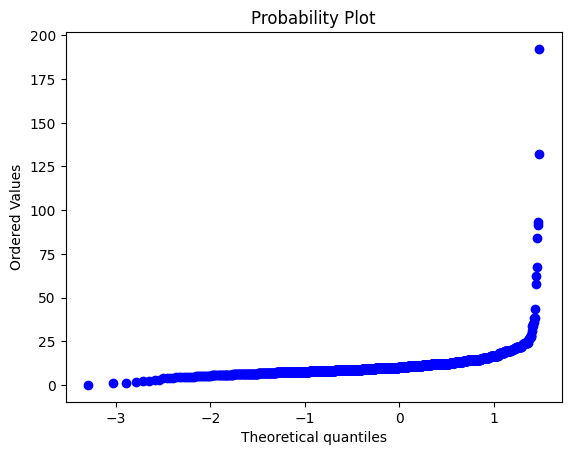

In [14]:
# sm.qqplot(data_cz_job['Salary'], line='45')
stats.probplot(data_cz_job['Salary'], dist="norm", plot=plt)
# plt.hist(data_cz_job['Salary'])
plt.show()

In [15]:
## Using the IQR to eliminate outliers for Salary, Average_hours, and Effort:

Q1_salary = data_cz_job['Salary'].quantile(0.25)
Q3_salary = data_cz_job['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

lower_bound_salary = Q1_salary - 3. * IQR_salary
upper_bound_salary = Q3_salary + 2.8 * IQR_salary

Q1_hrs = data_cz_job['Actual_hrs'].quantile(0.25)
Q3_hrs = data_cz_job['Actual_hrs'].quantile(0.75)
IQR_hrs = Q3_hrs - Q1_hrs

lower_bound_hrs = Q1_hrs - 3. * IQR_hrs
upper_bound_hrs = Q3_hrs + 3. * IQR_hrs

Q1_effort = data_cz_job['Effort'].quantile(0.25)
Q3_effort = data_cz_job['Effort'].quantile(0.75)
IQR_effort = Q3_effort - Q1_effort

lower_bound_effort = Q1_effort - 3.  * IQR_effort
upper_bound_effort = Q3_effort + 3. * IQR_effort




data_cz_job = data_cz_job[(data_cz_job['Salary'] > lower_bound_salary) & (data_cz_job['Salary'] < upper_bound_salary) &
                          (data_cz_job['Actual_hrs'] > lower_bound_hrs) & (data_cz_job['Actual_hrs'] < upper_bound_hrs) &
                           (data_cz_job['Effort'] > lower_bound_effort) & (data_cz_job['Effort'] < upper_bound_effort)].reset_index(drop=True)

data_cz_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.0,15.0,1.0,...,4.0,5.0,2.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.0,10.0,1.0,...,5.0,5.0,2.0,2.0,4.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,40.0,100.0,20.0,10.0,NaN,10.0,2.0,...,2.0,4.0,4.0,5.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.0,2.5,2.0,...,2.0,2.0,4.0,5.0,1.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.0,13.0,5.0,...,2.0,2.0,3.0,3.0,4.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0,4.0
1097,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.0,9.0,5.0,...,2.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1098,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.0,8.0,4.0,...,3.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1099,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.0,1.0,1.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0


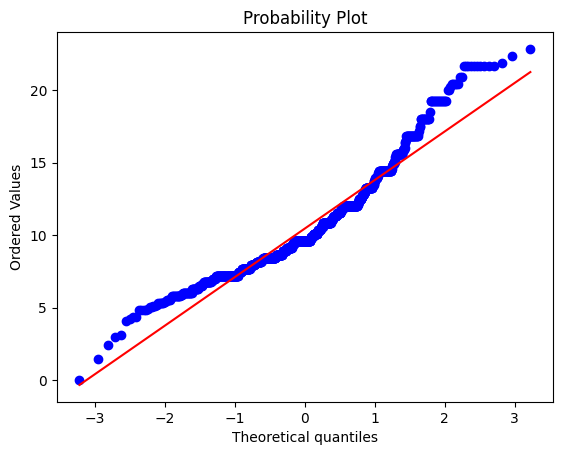

In [16]:
stats.probplot(data_cz_job['Salary'], dist="norm", plot=plt)
# plt.hist(data_cz_job['Salary'])
plt.show()

In [17]:
data_cz_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.0,15.0,1.0,...,4.0,5.0,2.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.0,10.0,1.0,...,5.0,5.0,2.0,2.0,4.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,40.0,100.0,20.0,10.0,NaN,10.0,2.0,...,2.0,4.0,4.0,5.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.0,2.5,2.0,...,2.0,2.0,4.0,5.0,1.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.0,13.0,5.0,...,2.0,2.0,3.0,3.0,4.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0,4.0
1097,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.0,9.0,5.0,...,2.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1098,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.0,8.0,4.0,...,3.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1099,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.0,1.0,1.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0


In [18]:
## Interpolating the missing answer data using averages from each job position:
data_cz_job_interpolated = data_cz_job
data_cz_job_interpolated.columns

for i in range(len(data_cz_job_interpolated.columns)-3):
  for j in np.sort(data_cz_job_interpolated['Current_position'].unique()):
    interpolation = data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
    & (data_cz_job_interpolated['Current_position']== j)] = interpolation #data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][data_cz_job_interpolated['Current_position']== j].mean()

data_cz_job_interpolated.to_csv('data_cz_job_interpolated.csv')
data_cz_job_interpolated



Interpolated Value: 9.27594830896244
Interpolated Value: 9.25288552662735
Interpolated Value: 8.866213652178295
Interpolated Value: 10.320503281722468
Interpolated Value: 13.285430480395359
Interpolated Value: 15.270072994827201
Interpolated Value: 9.625678035638476
Interpolated Value: 13.59663499306892
Interpolated Value: 39.739208633093526
Interpolated Value: 37.68421052631579
Interpolated Value: 40.0958904109589
Interpolated Value: 42.169099756691
Interpolated Value: 45.74295774647887
Interpolated Value: 44.70454545454545
Interpolated Value: 39.555045871559635
Interpolated Value: 47.666666666666664
Interpolated Value: 104.29279790453351
Interpolated Value: 108.75
Interpolated Value: 116.44393118827654
Interpolated Value: 114.17152788411914
Interpolated Value: 116.34372410936206
Interpolated Value: 113.7784090909091
Interpolated Value: 111.80314715865174
Interpolated Value: 115.59523809523809
Interpolated Value: nan
Interpolated Value: 23.7027027027027
Interpolated Value: 20.31690140

/tmp/ipython-input-3438967378.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]][(data_cz_job_interpolated[data_cz_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-343

Interpolated Value: 2.75
Interpolated Value: 3.0642201834862384
Interpolated Value: 3.8333333333333335
Interpolated Value: 3.629496402877698
Interpolated Value: 3.4473684210526314
Interpolated Value: 3.863013698630137
Interpolated Value: 3.6822660098522166
Interpolated Value: 3.6901408450704225
Interpolated Value: 3.2954545454545454
Interpolated Value: 3.361111111111111
Interpolated Value: 4.166666666666667
Interpolated Value: 3.4568345323741005
Interpolated Value: 3.5
Interpolated Value: 3.26027397260274
Interpolated Value: 3.2860635696821516
Interpolated Value: 3.4859154929577465
Interpolated Value: 3.8863636363636362
Interpolated Value: 3.5925925925925926
Interpolated Value: 2.8333333333333335
Interpolated Value: 3.539568345323741
Interpolated Value: 3.6052631578947367
Interpolated Value: 3.2739726027397262
Interpolated Value: 3.444987775061125
Interpolated Value: 3.4788732394366195
Interpolated Value: 3.953488372093023
Interpolated Value: 3.669724770642202
Interpolated Value: 3.0
I

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.000000,15.0,1.0,...,4.0,5.0,2.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.000000,10.0,1.0,...,5.0,5.0,2.0,2.0,4.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,40.0,100.0,20.0,10.0,2.507353,10.0,2.0,...,2.0,4.0,4.0,5.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.000000,2.5,2.0,...,2.0,2.0,4.0,5.0,1.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.000000,13.0,5.0,...,2.0,2.0,3.0,3.0,4.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.000000,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,2.0,3.0,1.0,4.0
1097,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.000000,9.0,5.0,...,2.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1098,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.000000,8.0,4.0,...,3.0,2.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0
1099,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.000000,1.0,1.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0


In [19]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_cz_job_w_inversion = data_cz_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_cz_job_w_inversion[col].unique()))
  data_cz_job_w_inversion[col] = max(data_cz_job_w_inversion[col])+1 - data_cz_job_w_inversion[col]
  print(col, ":", np.sort(data_cz_job_w_inversion[col].unique()))

data_cz_job_w_inversion.to_csv('data_cz_job_w_inversion.csv')
data_cz_job_w_inversion



Before: Follow_commands : [1.         2.         3.         3.05365854 3.29710145 4.
 5.        ]
Follow_commands : [1.         2.         2.70289855 2.94634146 3.         4.
 5.        ]
Before: Do_differently : [1.         2.         3.         3.36111111 3.68226601 4.
 5.        ]
Do_differently : [1.         2.         2.31773399 2.63888889 3.         4.
 5.        ]
Before: Forced_to_do : [1.         2.         2.95121951 3.         4.         5.        ]
Forced_to_do : [1.         2.         3.         3.04878049 4.         5.        ]


,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Follow_commands,Do_differently,Want_to_do,Done_best,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,5.0,29.0,1.000000,15.0,1.0,...,2.0,1.0,2.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0
1,33.0,3.0,4.326923,50.0,125.0,5.0,30.0,5.000000,10.0,1.0,...,1.0,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0,2.0
2,30.0,3.0,8.213535,40.0,100.0,20.0,10.0,2.507353,10.0,2.0,...,4.0,2.0,4.0,5.0,3.0,3.0,4.0,3.0,1.0,3.0
3,39.0,4.0,9.613782,40.0,100.0,33.0,10.0,6.000000,2.5,2.0,...,4.0,4.0,4.0,5.0,5.0,4.0,5.0,2.0,1.0,2.0
4,44.0,4.0,13.699640,40.0,100.0,20.0,2.0,5.000000,13.0,5.0,...,4.0,4.0,3.0,3.0,2.0,5.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,45.0,4.0,8.652404,40.0,100.0,17.0,17.0,4.000000,2.0,1.0,...,2.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,4.0
1097,57.0,6.0,12.017228,40.0,100.0,18.0,6.0,1.000000,9.0,5.0,...,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
1098,40.0,4.0,10.334816,40.0,100.0,22.0,6.0,4.000000,8.0,4.0,...,3.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
1099,29.0,4.0,9.613782,40.0,100.0,5.0,1.0,1.000000,1.0,1.0,...,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0


In [20]:
data_cz_formatted = data_cz_job_w_inversion

data_cz_formatted = data_cz_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_cz_formatted['Teaching_percent'] = data_cz_formatted['Teaching_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted['Research_percent'] = data_cz_formatted['Research_hrs']/data_cz_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_cz_formatted = data_cz_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_cz_formatted['Academic_Resources'] = data_cz_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_cz_formatted['Perceived_Autonomy'] = data_cz_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


## Calculating average score for Leadership quality:
# data_cz_formatted['Leadership_quality'] = data_cz_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts']].mean(axis=1)
# data_cz_formatted = data_cz_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
# data_cz_formatted['Sense_of_community'] = data_cz_formatted[['Good_atmosphere', 'Good_cooperation',
#                                                              'Part_of_community']].mean(axis=1)
# data_cz_formatted = data_cz_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_cz_formatted['Job_satisfaction'] = data_cz_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_cz_formatted = data_cz_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_cz_formatted.to_csv('data_cz_formatted.csv')
print(data_cz_formatted.columns.tolist())

['Age', 'Current_position', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Job_satisfaction']


In [21]:
data_cz_formatted

,Age,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,1.0,10.000000,58.000000,3.166667,1.833333,2.2
1,33.0,3.0,4.326923,50.0,125.0,1.0,10.000000,60.000000,3.000000,1.500000,2.4
2,30.0,3.0,8.213535,40.0,100.0,2.0,47.050683,23.525342,2.333333,3.833333,2.8
3,39.0,4.0,9.613782,40.0,100.0,2.0,64.077670,19.417476,4.000000,4.500000,2.8
4,44.0,4.0,13.699640,40.0,100.0,5.0,50.000000,5.000000,3.166667,3.333333,3.6
...,...,...,...,...,...,...,...,...,...,...,...
1096,45.0,4.0,8.652404,40.0,100.0,1.0,42.500000,42.500000,3.833333,2.666667,2.6
1097,57.0,6.0,12.017228,40.0,100.0,5.0,52.941176,17.647059,3.833333,4.333333,4.0
1098,40.0,4.0,10.334816,40.0,100.0,4.0,55.000000,15.000000,3.833333,4.000000,4.0
1099,29.0,4.0,9.613782,40.0,100.0,1.0,62.500000,12.500000,3.166667,3.500000,3.4


In [22]:
## Taking only academic seniority positions:

# data_cz_formatted_academic = data_cz_formatted[~data_cz_formatted['Current_position'].isin([1., 9.])]
data_cz_formatted_academic = data_cz_formatted[data_cz_formatted['Current_position'].isin([3., 4., 5., 6.])]

np.sort(data_cz_formatted_academic['Current_position'].unique())

array([3., 4., 5., 6.])

In [23]:
data_cz_formatted_academic.to_csv('data_cz_formatted_seniority.csv')
data_cz_formatted_academic

,Age,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Job_satisfaction
0,28.0,3.0,9.613782,50.0,125.0,1.0,10.000000,58.000000,3.166667,1.833333,2.2
1,33.0,3.0,4.326923,50.0,125.0,1.0,10.000000,60.000000,3.000000,1.500000,2.4
2,30.0,3.0,8.213535,40.0,100.0,2.0,47.050683,23.525342,2.333333,3.833333,2.8
3,39.0,4.0,9.613782,40.0,100.0,2.0,64.077670,19.417476,4.000000,4.500000,2.8
4,44.0,4.0,13.699640,40.0,100.0,5.0,50.000000,5.000000,3.166667,3.333333,3.6
...,...,...,...,...,...,...,...,...,...,...,...
1096,45.0,4.0,8.652404,40.0,100.0,1.0,42.500000,42.500000,3.833333,2.666667,2.6
1097,57.0,6.0,12.017228,40.0,100.0,5.0,52.941176,17.647059,3.833333,4.333333,4.0
1098,40.0,4.0,10.334816,40.0,100.0,4.0,55.000000,15.000000,3.833333,4.000000,4.0
1099,29.0,4.0,9.613782,40.0,100.0,1.0,62.500000,12.500000,3.166667,3.500000,3.4


Text(0.5, 1.0, 'Czech Positions')

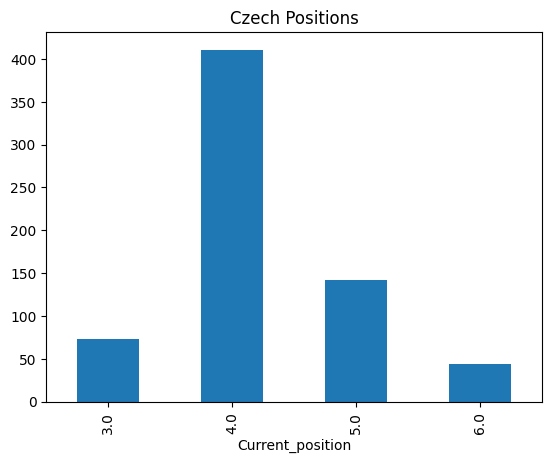

In [24]:
data_cz_formatted_academic['Current_position'].value_counts().sort_index().plot(kind='bar')
plt.title('Czech Positions')

In [25]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_cz_formatted_academic_w_dummies = pd.get_dummies(data_cz_formatted_academic, columns = ['Current_position'], drop_first=True) ## 'Contract_duration', 'Leadership_position'

# print(data_cz_formatted_academic_w_dummies[data_cz_formatted_academic_w_dummies.isna().any(axis=1)])

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.dropna().reset_index(drop=True)

data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.astype(float)

Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col]
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols]

## Calculating the interaction terms for Age moderator:
for col in Working_condition_cols:
  data_cz_formatted_academic_w_dummies[col+'_mod_Age'] = data_cz_formatted_academic_w_dummies[col] * data_cz_formatted_academic_w_dummies['Age']

# data_cz_formatted_academic_w_dummies = data_cz_formatted_academic_w_dummies.drop(['Age_mod_Age', 'Job_satisfaction_mod_Age'], axis=1)

data_cz_formatted_academic_w_dummies.to_csv('data_cz_formatted_academic_w_dummies.csv')

print(data_cz_formatted_academic_w_dummies.columns.tolist())
print(np.shape(data_cz_formatted_academic_w_dummies))

['Age', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Job_satisfaction', 'Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age']
(670, 21)


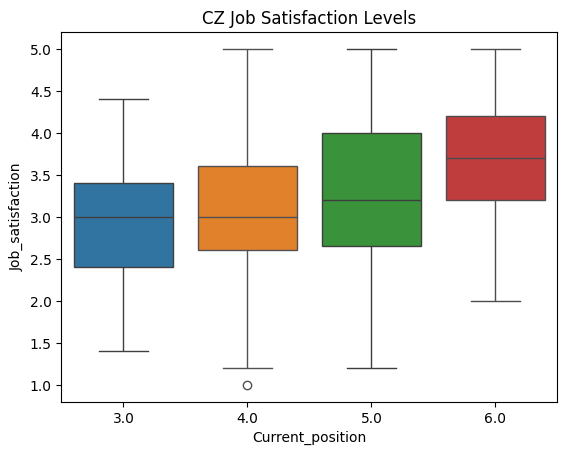

,Current Position,Job Satisfaction,Confidence Interval
0,3.0,2.887671,"[1.600, 4.240]"
1,4.0,3.033332,"[1.600, 4.600]"
2,5.0,3.273709,"[1.800, 4.800]"
3,6.0,3.704228,"[2.215, 4.800]"


In [26]:
satisfaction = pd.DataFrame()
pos = []
satis = []
pbci = []

plt.figure()
for value in np.sort(data_cz_formatted_academic['Current_position'].unique()):
  pos.append(value)
  data = data_cz_formatted_academic[data_cz_formatted_academic['Current_position']==value]
  satis.append(data['Job_satisfaction'].mean())
  lbound = np.percentile(data['Job_satisfaction'], 2.5)
  ubound = np.percentile(data['Job_satisfaction'], 97.5)
  pbci.append(f'[{lbound:.3f}, {ubound:.3f}]')
  sns.boxplot(x='Current_position', y = 'Job_satisfaction', data = data)
plt.title('CZ Job Satisfaction Levels')
plt.show()



satisfaction['Current Position'] = pos
satisfaction['Job Satisfaction'] = satis
satisfaction['Confidence Interval'] = pbci
satisfaction


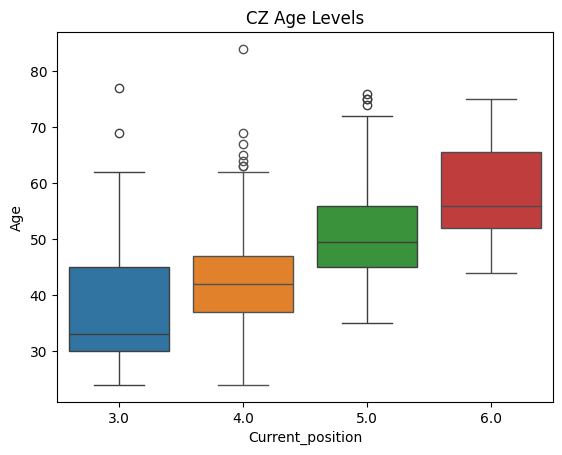

In [27]:
plt.figure()
for value in np.sort(data_cz_formatted_academic['Current_position'].unique()):
  data = data_cz_formatted_academic[data_cz_formatted_academic['Current_position']==value]
  sns.boxplot(x='Current_position', y = 'Age', data = data)
plt.title('CZ Age Levels')
plt.show()

## Correlations and VIF Multicollinearity:

Text(0.5, 1.0, 'CZ Correlation Heatmap')

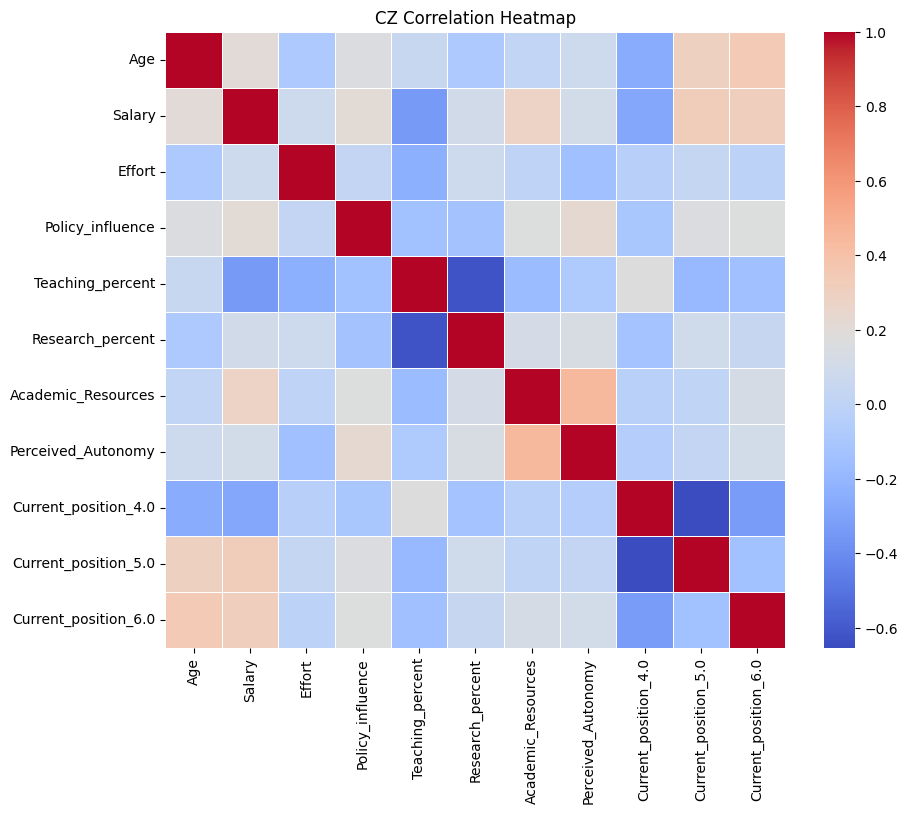

In [28]:
corr_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' not in col
             and 'Job_satisfaction' not in col and 'Actual_hrs' not in col]
correlations = data_cz_formatted_academic_w_dummies[corr_cols].corr()

plt.figure(figsize=(10, 8)) #, dpi = 600)
sns.heatmap(correlations, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('CZ Correlation Heatmap')

In [29]:
## Performing Variance Inflation Factor (VIF) analysis of the dataset:

Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]
## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col]
## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols+Moderation_cols]

for cols in [Current_position_dummy_cols, Working_condition_cols, Moderation_cols]:
  if cols == Current_position_dummy_cols:
    print('Current Position:')
  elif cols == Working_condition_cols:
    print('Working Conditions:')
  elif cols == Moderation_cols:
    print('Age-Moderated Working Conditions:')
  X = data_cz_formatted_academic_w_dummies[cols].copy()
  X_const = add_constant(X)
  vif_data = pd.DataFrame()
  vif_data['Variable'] = X_const.columns
  vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

  print(vif_data)
  print('----------------------------------------')

Current Position:
               Variable       VIF
0                 const  9.178082
1  Current_position_4.0  2.562993
2  Current_position_5.0  2.320998
3  Current_position_6.0  1.497485
----------------------------------------
Working Conditions:
             Variable         VIF
0               const  115.134245
1              Salary    1.262867
2          Actual_hrs    1.549086
3              Effort    1.467523
4    Policy_influence    1.235369
5    Teaching_percent    2.120420
6    Research_percent    1.877231
7  Academic_Resources    1.341238
8  Perceived_Autonomy    1.376727
----------------------------------------
Age-Moderated Working Conditions:
                     Variable        VIF
0                       const  18.258060
1              Salary_mod_Age   2.081859
2          Actual_hrs_mod_Age   2.309463
3              Effort_mod_Age   2.485428
4    Policy_influence_mod_Age   1.669561
5    Teaching_percent_mod_Age   1.533584
6    Research_percent_mod_Age   1.618427
7  Acade

## Calculating Cronbach's Alpha for the combined factors:

In [30]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [31]:
## Academic Resources:

data_cz_for_alpha_academic = data_cz_job_w_inversion[(data_cz_job_w_inversion['Current_position'].isin([3., 4., 5., 6.]))].dropna() #&
                                                    #  (data_cz_job_w_inversion['Contract_duration']<5) &
                                                    #  (data_cz_job_w_inversion['Leadership_position']<4)].dropna()

values = data_cz_for_alpha_academic['Teaching_hrs']/data_cz_for_alpha_academic[['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs']].sum(axis=1)
data_cz_for_alpha_academic = data_cz_for_alpha_academic.drop(values[values.isna()].index)

print(len(data_cz_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_cz_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_cz_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

# leadership_quality_for_alpha = np.asarray(data_cz_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts']])

# sense_of_community_for_alpha = np.asarray(data_cz_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_cz_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']])


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
# lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
# sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





670
Academic Resources Cronbach Alpha: 0.7846370080538884
Perceived Autonomy Cronbach Alpha: 0.8653308606107644
---------------------
Job Satisfaction Cronbach Alpha: 0.780772795950254


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [32]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age', 'Actual_hrs']
Current_position_dummy_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]

## Taking the moderation coefficients separately:
# Working_condition_cols = ['Salary', 'Effort', 'Teaching_percent', 'Research_percent', 'Academic_Resources',
#                           'Perceived_Autonomy', 'Policy_influence']
# Moderation_cols = [col+'_mod_Age' for col in Working_condition_cols] #
Moderation_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' in col and 'Actual_hrs' not in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_cz_formatted_academic_w_dummies.columns if 'mod_Age' not in col and
                          col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

Working_condition_cols

['Salary',
 'Effort',
 'Policy_influence',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy']

In [33]:
Current_position_dummy_cols

['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']

In [70]:
Moderation_cols

['Salary_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age']

## Bayesian SEM (MCMC) with Age Moderation:

In [101]:
## Defining the current position columns:
Current_position_4 = data_cz_formatted_academic_w_dummies['Current_position_4.0']
Current_position_5 = data_cz_formatted_academic_w_dummies['Current_position_5.0']
Current_position_6 = data_cz_formatted_academic_w_dummies['Current_position_6.0']
## Defining the working condition columns:
Salary = data_cz_formatted_academic_w_dummies['Salary']
Effort = data_cz_formatted_academic_w_dummies['Effort']
Teaching_percent = data_cz_formatted_academic_w_dummies['Teaching_percent']
Research_percent = data_cz_formatted_academic_w_dummies['Research_percent']
Policy_influence = data_cz_formatted_academic_w_dummies['Policy_influence']
Academic_Resources = data_cz_formatted_academic_w_dummies['Academic_Resources']
Perceived_Autonomy = data_cz_formatted_academic_w_dummies['Perceived_Autonomy']
## Defining the Age column:
Age = data_cz_formatted_academic_w_dummies['Age']
## Defining the Job Satisfaction column:
Job_satisfaction = data_cz_formatted_academic_w_dummies['Job_satisfaction']

In [115]:
## Model based on the mediation model outlined here: https://www.pymc.io/projects/examples/en/stable/case_studies/mediation_analysis.html

def mediation_model(Current_position_4, Current_position_5, Current_position_6, Salary, Effort,
                    Teaching_percent, Research_percent, Policy_influence, Academic_Resources,
                    Perceived_Autonomy, Age, Job_satisfaction):
    with pm.Model() as model:
        ## Setting up the job position parameters:
        Current_position_4 = pm.Data("Current_position_4", Current_position_4, dims="obs_id")
        Current_position_5 = pm.Data("Current_position_5", Current_position_5, dims="obs_id")
        Current_position_6 = pm.Data("Current_position_6", Current_position_6, dims="obs_id")
        ## Setting up the Job Satisfaction response variable:
        Job_satisfaction = pm.Data("Job_satisfaction", Job_satisfaction, dims="obs_id")
        ## Setting up the mediation coefficients (Working Conditions):
        Salary = pm.Data("Salary", Salary, dims="obs_id")
        Effort = pm.Data("Effort", Effort, dims="obs_id")
        Teaching_percent = pm.Data("Teaching_percent", Teaching_percent, dims="obs_id")
        Research_percent = pm.Data("Research_percent", Research_percent, dims="obs_id")
        Policy_influence = pm.Data("Policy_influence", Policy_influence, dims="obs_id")
        Academic_Resources = pm.Data("Academic_Resources", Academic_Resources, dims="obs_id")
        Perceived_Autonomy = pm.Data("Perceived_Autonomy", Perceived_Autonomy, dims="obs_id")

        ## Setting up the Moderator (Age):
        Age = pm.Data('Age', Age, dims="obs_id")

        # intercept priors
        iy = pm.Normal("iy", mu=0, sigma=10)
        im1 = pm.Normal("im1", mu=0, sigma=10) ## for Salary
        im2 = pm.Normal("im2", mu=0, sigma=10) ## for Effort
        im3 = pm.Normal("im3", mu=0, sigma=10) ## for Teaching %
        im4 = pm.Normal("im4", mu=0, sigma=10) ## for Research %
        im5 = pm.Normal("im5", mu=0, sigma=10) ## for Policy Influence
        im6 = pm.Normal("im6", mu=0, sigma=10) ## for Academic Resources
        im7 = pm.Normal("im7", mu=0, sigma=10) ## for Perceived Autonomy

        # Working condition coefficient priors:
        a11 = pm.Normal("a11", mu=0, sigma=1) ## for Salary ~ Position 4
        a12 = pm.Normal("a12", mu=0, sigma=1) ## for Salary ~ Position 5
        a13 = pm.Normal("a13", mu=0, sigma=1) ## for Salary ~ Position 6

        a21 = pm.Normal("a21", mu=0, sigma=1) ## for Effort ~ Position 4
        a22 = pm.Normal("a22", mu=0, sigma=1) ## for Effort ~ Position 5
        a23 = pm.Normal("a23", mu=0, sigma=1) ## for Effort ~ Position 6

        a31 = pm.Normal("a31", mu=0, sigma=1) ## for Teaching % ~ Position 4
        a32 = pm.Normal("a32", mu=0, sigma=1) ## for Teaching % ~ Position 5
        a33 = pm.Normal("a33", mu=0, sigma=1) ## for Teaching % ~ Position 6

        a41 = pm.Normal("a41", mu=0, sigma=1) ## for Research % ~ Position 4
        a42 = pm.Normal("a42", mu=0, sigma=1) ## for Research % ~ Position 5
        a43 = pm.Normal("a43", mu=0, sigma=1) ## for Research % ~ Position 6

        a51 = pm.Normal("a51", mu=0, sigma=1) ## for Policy Influence ~ Position 4
        a52 = pm.Normal("a52", mu=0, sigma=1) ## for Policy Influence ~ Position 5
        a53 = pm.Normal("a53", mu=0, sigma=1) ## for Policy Influence ~ Position 6

        a61 = pm.Normal("a61", mu=0, sigma=1) ## for Academic Resources ~ Position 4
        a62 = pm.Normal("a62", mu=0, sigma=1) ## for Academic Resources ~ Position 5
        a63 = pm.Normal("a63", mu=0, sigma=1) ## for Academic Resources ~ Position 6

        a71 = pm.Normal("a71", mu=0, sigma=1) ## for Perceived Autonomy ~ Position 4
        a72 = pm.Normal("a72", mu=0, sigma=1) ## for Perceived Autonomy ~ Position 5
        a73 = pm.Normal("a73", mu=0, sigma=1) ## for Perceived Autonomy ~ Position 6


        ## Mediation coefficient oriors:
        m1 = pm.Normal("m1", mu=0, sigma=1) ## for Job Satisfaction ~ Salary
        m2 = pm.Normal("m2", mu=0, sigma=1) ## for Job Satisfaction ~ Effort
        m3 = pm.Normal("m3", mu=0, sigma=1) ## for Job Satisfaction ~ Teaching %
        m4 = pm.Normal("m4", mu=0, sigma=1) ## for Job Satisfaction ~ Research %
        m5 = pm.Normal("m5", mu=0, sigma=1) ## for Job Satisfaction ~ Policy Influence
        m6 = pm.Normal("m6", mu=0, sigma=1) ## for Job Satisfaction ~ Academic Resources
        m7 = pm.Normal("m7", mu=0, sigma=1) ## for Job Satisfaction ~ Perceived Autonomy

        ## Moderation coefficient priors:
        mod1 = pm.Normal("mod1", mu=0, sigma=1) ## for Age-Moderation on Salary
        mod2 = pm.Normal("mod2", mu=0, sigma=1) ## for Age-Moderation on Effort
        mod3 = pm.Normal("mod3", mu=0, sigma=1) ## for Age-Moderation on Teaching %
        mod4 = pm.Normal("mod4", mu=0, sigma=1) ## for Age-Moderation on Research %
        mod5 = pm.Normal("mod5", mu=0, sigma=1) ## for Age-Moderation on Policy Influence
        mod6 = pm.Normal("mod6", mu=0, sigma=1) ## for Age-Moderation on Academic Resources
        mod7 = pm.Normal("mod7", mu=0, sigma=1) ## for Age-Moderation on Perceived Autonomy

        ## Direct Path coefficient priors:
        Dir_Path1 = pm.Normal("Dir_Path1", mu=0, sigma=1) ## for Job Position 4
        Dir_Path2 = pm.Normal("Dir_Path2", mu=0, sigma=1) ## for Job Position 5
        Dir_Path3 = pm.Normal("Dir_Path3", mu=0, sigma=1) ## for Job Position 6
        # noise priors
        σm1 = pm.HalfCauchy("σm1", 1) ## Noise for mediation for Salary
        σm2 = pm.HalfCauchy("σm2", 1) ## Noise for mediation for Effort
        σm3 = pm.HalfCauchy("σm3", 1) ## Noise for mediation for Teaching %
        σm4 = pm.HalfCauchy("σm4", 1) ## Noise for mediation for Research %
        σm5 = pm.HalfCauchy("σm5", 1) ## Noise for mediation for Policy Influence
        σm6 = pm.HalfCauchy("σm6", 1) ## Noise for mediation for Academic Resources
        σm7 = pm.HalfCauchy("σm7", 1) ## Noise for mediation for Perceived Autonomy
        σy = pm.HalfCauchy("σy", 1) ## Noise for full model

        # likelihood
        pm.Normal("Salary_likelihood", mu=im1 + a11*Current_position_4 + a12*Current_position_5 + a13*Current_position_6, sigma=σm1, observed=Salary, dims="obs_id")
        pm.Normal("Effort_likelihood", mu=im2 + a21*Current_position_4 + a22*Current_position_5 + a23*Current_position_6, sigma=σm2, observed=Effort, dims="obs_id")
        pm.Normal("Teaching_likelihood", mu=im3 + a31*Current_position_4 + a32*Current_position_5 + a33*Current_position_6, sigma=σm3, observed=Teaching_percent, dims="obs_id")
        pm.Normal("Research_likelihood", mu=im4 + a41*Current_position_4 + a42*Current_position_5 + a43*Current_position_6, sigma=σm4, observed=Research_percent, dims="obs_id")
        pm.Normal("Policy_likelihood", mu=im5 + a51*Current_position_4 + a52*Current_position_5 + a53*Current_position_6, sigma=σm5, observed=Policy_influence, dims="obs_id")
        pm.Normal("Acad_Res_likelihood", mu=im6 + a61*Current_position_4 + a62*Current_position_5 + a63*Current_position_6, sigma=σm6, observed=Academic_Resources, dims="obs_id")
        pm.Normal("Autonomy_likelihood", mu=im7 + a71*Current_position_4 + a72*Current_position_5 + a73*Current_position_6, sigma=σm7, observed=Perceived_Autonomy, dims="obs_id")
        pm.Normal("y_likelihood", mu=iy + m1*Salary + m2*Effort + m3*Teaching_percent +
                  m4*Research_percent + m5*Policy_influence + m6*Academic_Resources + m7*Perceived_Autonomy +
                  mod1*Salary*Age + mod2*Effort*Age + mod3*Teaching_percent*Age + mod4*Research_percent*Age +
                  mod5*Policy_influence*Age + mod6*Academic_Resources*Age + mod7*Perceived_Autonomy +
                  Dir_Path1*Current_position_4 + Dir_Path2*Current_position_5 + Dir_Path3*Current_position_6,
                  sigma=σy, observed=Job_satisfaction, dims="obs_id")

        # Calculating Mediation coefficients:
        indirect_effect_salary1 = pm.Deterministic("Indirect effect (Salary) 1", a11 * m1) ## Mediation path coefficient for Job Position 4 med by Salary
        indirect_effect_salary2 = pm.Deterministic("Indirect effect (Salary) 2", a12 * m1) ## Mediation path coefficient for Job Position 5 med by Salary
        indirect_effect_salary3 = pm.Deterministic("Indirect effect (Salary) 3", a13 * m1) ## Mediation path coefficient for Job Position 6 med by Salary

        indirect_effect_effort1 = pm.Deterministic("Indirect effect (Effort) 1", a21 * m2) ## Mediation path coefficient for Job Position 4 med by Effort
        indirect_effect_effort2 = pm.Deterministic("Indirect effect (Effort) 2", a22 * m2) ## Mediation path coefficient for Job Position 5 med by Effort
        indirect_effect_effort3 = pm.Deterministic("Indirect effect (Effort) 3", a23 * m2) ## Mediation path coefficient for Job Position 6 med by Effort

        indirect_effect_teaching1 = pm.Deterministic("Indirect effect (Teaching) 1", a31 * m3) ## Mediation path coefficient for Job Position 4 med by Teaching %
        indirect_effect_teaching2 = pm.Deterministic("Indirect effect (Teaching) 2", a32 * m3) ## Mediation path coefficient for Job Position 5 med by Teaching %
        indirect_effect_teaching3 = pm.Deterministic("Indirect effect (Teaching) 3", a33 * m3) ## Mediation path coefficient for Job Position 6 med by Teaching %

        indirect_effect_research1 = pm.Deterministic("Indirect effect (Research) 1", a41 * m4) ## Mediation path coefficient for Job Position 4 med by Research %
        indirect_effect_research2 = pm.Deterministic("Indirect effect (Research) 2", a42 * m4) ## Mediation path coefficient for Job Position 5 med by Research %
        indirect_effect_research3 = pm.Deterministic("Indirect effect (Research) 3", a43 * m4) ## Mediation path coefficient for Job Position 6 med by Research %

        indirect_effect_policy1 = pm.Deterministic("Indirect effect (Policy) 1", a51 * m5) ## Mediation path coefficient for Job Position 4 med by Policy Influence
        indirect_effect_policy2 = pm.Deterministic("Indirect effect (Policy) 2", a52 * m5) ## Mediation path coefficient for Job Position 5 med by Policy Influence
        indirect_effect_policy3 = pm.Deterministic("Indirect effect (Policy) 3", a53 * m5) ## Mediation path coefficient for Job Position 6 med by Policy Influence

        indirect_effect_resources1 = pm.Deterministic("Indirect effect (Acad Resources) 1", a61 * m6) ## Mediation path coefficient for Job Position 4 med by Academic Resources
        indirect_effect_resources2 = pm.Deterministic("Indirect effect (Acad Resources) 2", a62 * m6) ## Mediation path coefficient for Job Position 5 med by Academic Resources
        indirect_effect_resources3 = pm.Deterministic("Indirect effect (Acad Resources) 3", a63 * m6) ## Mediation path coefficient for Job Position 6 med by Academic Resources

        indirect_effect_autonomy1 = pm.Deterministic("Indirect effect (Autonomy) 1", a71 * m7) ## Mediation path coefficient for Job Position 4 med by Perceived Autonomy
        indirect_effect_autonomy2 = pm.Deterministic("Indirect effect (Autonomy) 2", a72 * m7) ## Mediation path coefficient for Job Position 5 med by Perceived Autonomy
        indirect_effect_autonomy3 = pm.Deterministic("Indirect effect (Autonomy) 3", a73 * m7) ## Mediation path coefficient for Job Position 6 med by Perceived Autonomy

        # Calculating Moderation coefficients:
        mod_effect_salary1 = pm.Deterministic("Moderation effect (Salary) 1", a11 * mod1) ## Moderation path coefficient for Job Position 4 and Salary
        mod_effect_salary2 = pm.Deterministic("Moderation effect (Salary) 2", a12 * mod1) ## Moderation path coefficient for Job Position 5 and Salary
        mod_effect_salary3 = pm.Deterministic("Moderation effect (Salary) 3", a13 * mod1) ## Moderation path coefficient for Job Position 6 and Salary

        mod_effect_effort1 = pm.Deterministic("Moderation effect (Effort) 1", a21 * mod2) ## Moderation path coefficient for Job Position 4 and Effort
        mod_effect_effort2 = pm.Deterministic("Moderation effect (Effort) 2", a22 * mod2) ## Moderation path coefficient for Job Position 5 and Effort
        mod_effect_effort3 = pm.Deterministic("Moderation effect (Effort) 3", a23 * mod2) ## Moderation path coefficient for Job Position 6 and Effort

        mod_effect_teaching1 = pm.Deterministic("Moderation effect (Teaching) 1", a31 * mod3) ## Moderation path coefficient for Job Position 4 and Teaching %
        mod_effect_teaching2 = pm.Deterministic("Moderation effect (Teaching) 2", a32 * mod3) ## Moderation path coefficient for Job Position 5 and Teaching %
        mod_effect_teaching3 = pm.Deterministic("Moderation effect (Teaching) 3", a33 * mod3) ## Moderation path coefficient for Job Position 6 and Teaching %

        mod_effect_research1 = pm.Deterministic("Moderation effect (Research) 1", a41 * mod4) ## Moderation path coefficient for Job Position 4 and Research %
        mod_effect_research2 = pm.Deterministic("Moderation effect (Research) 2", a42 * mod4) ## Moderation path coefficient for Job Position 5 and Research %
        mod_effect_research3 = pm.Deterministic("Moderation effect (Research) 3", a43 * mod4) ## Moderation path coefficient for Job Position 6 and Research %

        mod_effect_policy1 = pm.Deterministic("Moderation effect (Policy) 1", a51 * mod5) ## Moderation path coefficient for Job Position 4 and Policy Influence
        mod_effect_policy2 = pm.Deterministic("Moderation effect (Policy) 2", a52 * mod5) ## Moderation path coefficient for Job Position 5 and Policy Influence
        mod_effect_policy3 = pm.Deterministic("Moderation effect (Policy) 3", a53 * mod5) ## Moderation path coefficient for Job Position 6 and Policy Influence

        mod_effect_resources1 = pm.Deterministic("Moderation effect (Acad Resources) 1", a61 * mod6) ## Moderation path coefficient for Job Position 4 and Academic Resources
        mod_effect_resources2 = pm.Deterministic("Moderation effect (Acad Resources) 2", a62 * mod6) ## Moderation path coefficient for Job Position 5 and Academic Resources
        mod_effect_resources3 = pm.Deterministic("Moderation effect (Acad Resources) 3", a63 * mod6) ## Moderation path coefficient for Job Position 6 and Academic Resources

        mod_effect_autonomy1 = pm.Deterministic("Moderation effect (Autonomy) 1", a71 * mod7) ## Moderation path coefficient for Job Position 4 and Perceived Autonomy
        mod_effect_autonomy2 = pm.Deterministic("Moderation effect (Autonomy) 2", a72 * mod7) ## Moderation path coefficient for Job Position 5 and Perceived Autonomy
        mod_effect_autonomy3 = pm.Deterministic("Moderation effect (Autonomy) 3", a73 * mod7) ## Moderation path coefficient for Job Position 6 and Perceived Autonomy


    return model


model = mediation_model(Current_position_4, Current_position_5, Current_position_6, Salary, Effort,
                    Teaching_percent, Research_percent, Policy_influence, Academic_Resources,
                    Perceived_Autonomy, Age, Job_satisfaction)
# pm.model_to_graphviz(model)

In [116]:
with model:
    result = pm.sample(tune=4000, target_accept=0.9, random_seed=42) #pm.sample(1000, tune=1000, chains=4)
result_posterior_samples = result.posterior.to_dataframe()
result_posterior_samples

Output()

Dir_Path1  Dir_Path2  Dir_Path3  \
chain draw                                    
0     0     -0.057156  -0.012957  -0.111571   
      1      0.030530   0.032746  -0.005868   
      2      0.057137   0.107542   0.094795   
      3     -0.186217  -0.211064  -0.094343   
      4     -0.171558  -0.219206  -0.076103   
...               ...        ...        ...   
1     995   -0.144882  -0.133436  -0.225812   
      996   -0.081379   0.047573   0.180320   
      997   -0.048583  -0.154923  -0.265304   
      998   -0.160313  -0.036420   0.028203   
      999   -0.020416  -0.115019  -0.156205   

            Indirect effect (Acad Resources) 1  \
chain draw                                       
0     0                              -0.024703   
      1                               0.059198   
      2                               0.099225   
      3                              -0.005452   
      4                              -0.010196   
...                                        ...   
1     995                             0.017547   
      996                             0.071808   
      997                             0.040911   
      998                             0.103099   
      999                             0.021566   

            Indirect effect (Acad Resources) 2  \
chain draw                                       
0     0                              -0.002323   
      1                               0.116125   
      2                               0.088802   
      3                              -0.012672   
      4                              -0.008981   
...                                        ...   
1     995                             0.053412   
      996                             0.123068   
      997                             0.036646   
      998                             0.146308   
      999                             0.042089   

            Indirect effect (Acad Resources) 3  Indirect effect (Autonomy) 1  \
chain draw                                                                     
0     0                               0.172037                      0.002854   
      1                               0.294443                     -0.004234   
      2                               0.274417                      0.000768   
      3                               0.098229                     -0.113566   
      4                               0.086717                     -0.061709   
...                                        ...                           ...   
1     995                             0.151112                     -0.002167   
      996                             0.240095                     -0.010556   
      997                             0.167152                     -0.005324   
      998                             0.323583                      0.020376   
      999                             0.150295                      0.066781   

            Indirect effect (Autonomy) 2  Indirect effect (Autonomy) 3  \
chain draw                                                               
0     0                         0.072455                      0.173447   
      1                         0.049701                      0.086154   
      2                         0.041293                      0.023082   
      3                         0.022682                      0.517439   
      4                         0.021631                      0.442072   
...                                  ...                           ...   
1     995                       0.000841                      0.005804   
      996                      -0.079819                     -0.098611   
      997                      -0.004064                     -0.033245   
      998                       0.098697                      0.191913   
      999                       0.067416                      0.159775   

            Indirect effect (Effort) 1  ...      mod6      mod7       σm1  \
chain draw       

In [117]:
result_posterior_samples.to_csv('CZ_MCMC_Posterior.csv')

In [138]:
path_to_bayesian = 'https://raw.githubusercontent.com/AndreiAf02/Job-Satisfaction/refs/heads/main/Bayesian_SEM/'

result_posterior_samples = pd.read_csv(path_to_bayesian+'CZ_MCMC_Posterior.csv', sep=",", header=0).iloc[:,1:]


## Analyzing the MCMC results:

In [139]:
med_unique = ['Indirect effect (Salary)', 'Indirect effect (Effort)', 'Indirect effect (Teaching)',
              'Indirect effect (Research)',  'Indirect effect (Policy)', 'Indirect effect (Acad Resources)',
              'Indirect effect (Autonomy)']

mod_unique = ['Moderation effect (Salary)', 'Moderation effect (Effort)', 'Moderation effect (Teaching)',
              'Moderation effect (Research)', 'Moderation effect (Policy)', 'Moderation effect (Acad Resources)',
              'Moderation effect (Autonomy)']

dir_path_unique = ['Dir_Path1', 'Dir_Path2', 'Dir_Path3']

med_ci = pd.DataFrame()
mod_ci = pd.DataFrame()
med_prob = pd.DataFrame()
mod_prob = pd.DataFrame()
dir_path_ci = pd.DataFrame()
dir_path_prob = pd.DataFrame()

med_ci['Current_position'] = ['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']
mod_ci['Current_position'] = ['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']
med_prob['Current_position'] = ['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']
mod_prob['Current_position'] = ['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']
dir_path_ci['Current_position'] = ['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']
dir_path_prob['Current_position'] = ['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']

for col in med_unique:
  med_ci_vals = []
  med_prob_vals = []
  for i in range(3):
    data = result_posterior_samples[col+" "+str(i+1)]
    lbound = np.percentile(data, 2.5)
    ubound = np.percentile(data, 97.5)
    probability_of_positivity = np.mean(data > 0)
    med_ci_vals.append(f'[{lbound:.5f}, {ubound:.5f}]')
    med_prob_vals.append(probability_of_positivity)
  med_ci[col] = med_ci_vals
  med_prob[col] = med_prob_vals


for col in mod_unique:
  mod_ci_vals = []
  mod_prob_vals = []
  for i in range(3):
    data = result_posterior_samples[col+" "+str(i+1)]
    lbound = np.percentile(data, 2.5)
    ubound = np.percentile(data, 97.5)
    probability_of_positivity = np.mean(data > 0)
    mod_ci_vals.append(f'[{lbound:.5f}, {ubound:.5f}]')
    mod_prob_vals.append(probability_of_positivity)
  mod_ci[col] = mod_ci_vals
  mod_prob[col] = mod_prob_vals


dir_path_ci_vals = []
dir_path_prob_vals = []
for i in range(3):
  data = result_posterior_samples[dir_path_unique[i]]
  lbound = np.percentile(data, 2.5)
  ubound = np.percentile(data, 97.5)
  probability_of_positivity = np.mean(data > 0)
  dir_path_ci_vals.append(f'[{lbound:.5f}, {ubound:.5f}]')
  dir_path_prob_vals.append(probability_of_positivity)
dir_path_ci['Direct Path'] = dir_path_ci_vals
dir_path_prob['Direct Path'] = dir_path_prob_vals

med_ci.set_index('Current_position').T

Current_position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Indirect effect (Salary),"[-0.02138, 0.10431]","[0.07163, 0.45090]","[0.09891, 0.63847]"
Indirect effect (Effort),"[-0.00763, 0.01163]","[-0.00660, 0.01436]","[-0.00957, 0.01096]"
Indirect effect (Teaching),"[-0.04025, 0.00352]","[-0.00366, 0.03484]","[-0.00671, 0.02815]"
Indirect effect (Research),"[-0.01224, 0.02444]","[-0.02011, 0.00975]","[-0.01549, 0.01078]"
Indirect effect (Policy),"[-0.14174, 0.01524]","[-0.26618, 0.03390]","[-0.36326, 0.04693]"
Indirect effect (Acad Resources),"[-0.03099, 0.14340]","[-0.02614, 0.17429]","[0.06740, 0.39471]"
Indirect effect (Autonomy),"[-0.14912, 0.23063]","[-0.23073, 0.33690]","[-0.51111, 0.78931]"


In [140]:
med_prob.set_index('Current_position').T

Current_position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Indirect effect (Salary),0.8795,0.9990,0.9990
Indirect effect (Effort),0.5705,0.6545,0.4935
Indirect effect (Teaching),0.0765,0.9010,0.8005
Indirect effect (Research),0.6960,0.3505,0.4595
Indirect effect (Policy),0.0810,0.0790,0.0790
Indirect effect (Acad Resources),0.8870,0.9200,0.9995
Indirect effect (Autonomy),0.5110,0.5470,0.5790


In [141]:
mod_ci.set_index('Current_position').T

Current_position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Moderation effect (Salary),"[-0.00139, 0.00036]","[-0.00669, 0.00145]","[-0.00921, 0.00208]"
Moderation effect (Effort),"[-0.00028, 0.00019]","[-0.00034, 0.00016]","[-0.00027, 0.00024]"
Moderation effect (Teaching),"[-0.00007, 0.00086]","[-0.00074, 0.00009]","[-0.00059, 0.00015]"
Moderation effect (Research),"[-0.00047, 0.00034]","[-0.00028, 0.00040]","[-0.00025, 0.00030]"
Moderation effect (Policy),"[0.00012, 0.00379]","[0.00042, 0.00700]","[0.00057, 0.00955]"
Moderation effect (Acad Resources),"[-0.00045, 0.00122]","[-0.00049, 0.00151]","[-0.00123, 0.00379]"
Moderation effect (Autonomy),"[-0.19129, 0.19474]","[-0.26520, 0.29866]","[-0.64841, 0.65296]"


In [142]:
mod_prob.set_index('Current_position').T

Current_position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Moderation effect (Salary),0.2255,0.1350,0.1350
Moderation effect (Effort),0.4290,0.3270,0.5030
Moderation effect (Teaching),0.9180,0.1065,0.2010
Moderation effect (Research),0.4075,0.5760,0.5220
Moderation effect (Policy),0.9880,0.9900,0.9900
Moderation effect (Acad Resources),0.7300,0.7510,0.7935
Moderation effect (Autonomy),0.5510,0.5620,0.5660


In [143]:
dir_path_ci

,Current_position,Direct Path
0,Current_position_4.0,"[-0.19444, 0.06206]"
1,Current_position_5.0,"[-0.22300, 0.11075]"
2,Current_position_6.0,"[-0.26252, 0.20072]"


In [144]:
dir_path_prob

,Current_position,Direct Path
0,Current_position_4.0,0.1780
1,Current_position_5.0,0.2735
2,Current_position_6.0,0.3800


## MCMC with No Moderation:

In [146]:
## Model based on the mediation model outlined here: https://www.pymc.io/projects/examples/en/stable/case_studies/mediation_analysis.html

def mediation_model_no_mod(Current_position_4, Current_position_5, Current_position_6, Salary, Effort,
                    Teaching_percent, Research_percent, Policy_influence, Academic_Resources,
                    Perceived_Autonomy, Job_satisfaction):
    with pm.Model() as model:
        ## Setting up the job position parameters:
        Current_position_4 = pm.Data("Current_position_4", Current_position_4, dims="obs_id")
        Current_position_5 = pm.Data("Current_position_5", Current_position_5, dims="obs_id")
        Current_position_6 = pm.Data("Current_position_6", Current_position_6, dims="obs_id")
        ## Setting up the Job Satisfaction response variable:
        Job_satisfaction = pm.Data("Job_satisfaction", Job_satisfaction, dims="obs_id")
        ## Setting up the mediation coefficients (Working Conditions):
        Salary = pm.Data("Salary", Salary, dims="obs_id")
        Effort = pm.Data("Effort", Effort, dims="obs_id")
        Teaching_percent = pm.Data("Teaching_percent", Teaching_percent, dims="obs_id")
        Research_percent = pm.Data("Research_percent", Research_percent, dims="obs_id")
        Policy_influence = pm.Data("Policy_influence", Policy_influence, dims="obs_id")
        Academic_Resources = pm.Data("Academic_Resources", Academic_Resources, dims="obs_id")
        Perceived_Autonomy = pm.Data("Perceived_Autonomy", Perceived_Autonomy, dims="obs_id")

        # intercept priors
        iy = pm.Normal("iy", mu=0, sigma=10)
        im1 = pm.Normal("im1", mu=0, sigma=10) ## for Salary
        im2 = pm.Normal("im2", mu=0, sigma=10) ## for Effort
        im3 = pm.Normal("im3", mu=0, sigma=10) ## for Teaching %
        im4 = pm.Normal("im4", mu=0, sigma=10) ## for Research %
        im5 = pm.Normal("im5", mu=0, sigma=10) ## for Policy Influence
        im6 = pm.Normal("im6", mu=0, sigma=10) ## for Academic Resources
        im7 = pm.Normal("im7", mu=0, sigma=10) ## for Perceived Autonomy

        # Working condition coefficient priors:
        a11 = pm.Normal("a11", mu=0, sigma=1) ## for Salary ~ Position 4
        a12 = pm.Normal("a12", mu=0, sigma=1) ## for Salary ~ Position 5
        a13 = pm.Normal("a13", mu=0, sigma=1) ## for Salary ~ Position 6

        a21 = pm.Normal("a21", mu=0, sigma=1) ## for Effort ~ Position 4
        a22 = pm.Normal("a22", mu=0, sigma=1) ## for Effort ~ Position 5
        a23 = pm.Normal("a23", mu=0, sigma=1) ## for Effort ~ Position 6

        a31 = pm.Normal("a31", mu=0, sigma=1) ## for Teaching % ~ Position 4
        a32 = pm.Normal("a32", mu=0, sigma=1) ## for Teaching % ~ Position 5
        a33 = pm.Normal("a33", mu=0, sigma=1) ## for Teaching % ~ Position 6

        a41 = pm.Normal("a41", mu=0, sigma=1) ## for Research % ~ Position 4
        a42 = pm.Normal("a42", mu=0, sigma=1) ## for Research % ~ Position 5
        a43 = pm.Normal("a43", mu=0, sigma=1) ## for Research % ~ Position 6

        a51 = pm.Normal("a51", mu=0, sigma=1) ## for Policy Influence ~ Position 4
        a52 = pm.Normal("a52", mu=0, sigma=1) ## for Policy Influence ~ Position 5
        a53 = pm.Normal("a53", mu=0, sigma=1) ## for Policy Influence ~ Position 6

        a61 = pm.Normal("a61", mu=0, sigma=1) ## for Academic Resources ~ Position 4
        a62 = pm.Normal("a62", mu=0, sigma=1) ## for Academic Resources ~ Position 5
        a63 = pm.Normal("a63", mu=0, sigma=1) ## for Academic Resources ~ Position 6

        a71 = pm.Normal("a71", mu=0, sigma=1) ## for Perceived Autonomy ~ Position 4
        a72 = pm.Normal("a72", mu=0, sigma=1) ## for Perceived Autonomy ~ Position 5
        a73 = pm.Normal("a73", mu=0, sigma=1) ## for Perceived Autonomy ~ Position 6


        ## Mediation coefficient oriors:
        m1 = pm.Normal("m1", mu=0, sigma=1) ## for Job Satisfaction ~ Salary
        m2 = pm.Normal("m2", mu=0, sigma=1) ## for Job Satisfaction ~ Effort
        m3 = pm.Normal("m3", mu=0, sigma=1) ## for Job Satisfaction ~ Teaching %
        m4 = pm.Normal("m4", mu=0, sigma=1) ## for Job Satisfaction ~ Research %
        m5 = pm.Normal("m5", mu=0, sigma=1) ## for Job Satisfaction ~ Policy Influence
        m6 = pm.Normal("m6", mu=0, sigma=1) ## for Job Satisfaction ~ Academic Resources
        m7 = pm.Normal("m7", mu=0, sigma=1) ## for Job Satisfaction ~ Perceived Autonomy

        ## Direct Path coefficient priors:
        Dir_Path1 = pm.Normal("Dir_Path1", mu=0, sigma=1) ## for Job Position 4
        Dir_Path2 = pm.Normal("Dir_Path2", mu=0, sigma=1) ## for Job Position 5
        Dir_Path3 = pm.Normal("Dir_Path3", mu=0, sigma=1) ## for Job Position 6
        # noise priors
        σm1 = pm.HalfCauchy("σm1", 1) ## Noise for mediation for Salary
        σm2 = pm.HalfCauchy("σm2", 1) ## Noise for mediation for Effort
        σm3 = pm.HalfCauchy("σm3", 1) ## Noise for mediation for Teaching %
        σm4 = pm.HalfCauchy("σm4", 1) ## Noise for mediation for Research %
        σm5 = pm.HalfCauchy("σm5", 1) ## Noise for mediation for Policy Influence
        σm6 = pm.HalfCauchy("σm6", 1) ## Noise for mediation for Academic Resources
        σm7 = pm.HalfCauchy("σm7", 1) ## Noise for mediation for Perceived Autonomy
        σy = pm.HalfCauchy("σy", 1) ## Noise for full model

        # likelihood
        pm.Normal("Salary_likelihood", mu=im1 + a11*Current_position_4 + a12*Current_position_5 + a13*Current_position_6, sigma=σm1, observed=Salary, dims="obs_id")
        pm.Normal("Effort_likelihood", mu=im2 + a21*Current_position_4 + a22*Current_position_5 + a23*Current_position_6, sigma=σm2, observed=Effort, dims="obs_id")
        pm.Normal("Teaching_likelihood", mu=im3 + a31*Current_position_4 + a32*Current_position_5 + a33*Current_position_6, sigma=σm3, observed=Teaching_percent, dims="obs_id")
        pm.Normal("Research_likelihood", mu=im4 + a41*Current_position_4 + a42*Current_position_5 + a43*Current_position_6, sigma=σm4, observed=Research_percent, dims="obs_id")
        pm.Normal("Policy_likelihood", mu=im5 + a51*Current_position_4 + a52*Current_position_5 + a53*Current_position_6, sigma=σm5, observed=Policy_influence, dims="obs_id")
        pm.Normal("Acad_Res_likelihood", mu=im6 + a61*Current_position_4 + a62*Current_position_5 + a63*Current_position_6, sigma=σm6, observed=Academic_Resources, dims="obs_id")
        pm.Normal("Autonomy_likelihood", mu=im7 + a71*Current_position_4 + a72*Current_position_5 + a73*Current_position_6, sigma=σm7, observed=Perceived_Autonomy, dims="obs_id")
        pm.Normal("y_likelihood", mu=iy + m1*Salary + m2*Effort + m3*Teaching_percent +
                  m4*Research_percent + m5*Policy_influence + m6*Academic_Resources + m7*Perceived_Autonomy +
                  Dir_Path1*Current_position_4 + Dir_Path2*Current_position_5 + Dir_Path3*Current_position_6,
                  sigma=σy, observed=Job_satisfaction, dims="obs_id")

        # Calculating Mediation coefficients:
        indirect_effect_salary1 = pm.Deterministic("Indirect effect (Salary) 1", a11 * m1) ## Mediation path coefficient for Job Position 4 med by Salary
        indirect_effect_salary2 = pm.Deterministic("Indirect effect (Salary) 2", a12 * m1) ## Mediation path coefficient for Job Position 5 med by Salary
        indirect_effect_salary3 = pm.Deterministic("Indirect effect (Salary) 3", a13 * m1) ## Mediation path coefficient for Job Position 6 med by Salary

        indirect_effect_effort1 = pm.Deterministic("Indirect effect (Effort) 1", a21 * m2) ## Mediation path coefficient for Job Position 4 med by Effort
        indirect_effect_effort2 = pm.Deterministic("Indirect effect (Effort) 2", a22 * m2) ## Mediation path coefficient for Job Position 5 med by Effort
        indirect_effect_effort3 = pm.Deterministic("Indirect effect (Effort) 3", a23 * m2) ## Mediation path coefficient for Job Position 6 med by Effort

        indirect_effect_teaching1 = pm.Deterministic("Indirect effect (Teaching) 1", a31 * m3) ## Mediation path coefficient for Job Position 4 med by Teaching %
        indirect_effect_teaching2 = pm.Deterministic("Indirect effect (Teaching) 2", a32 * m3) ## Mediation path coefficient for Job Position 5 med by Teaching %
        indirect_effect_teaching3 = pm.Deterministic("Indirect effect (Teaching) 3", a33 * m3) ## Mediation path coefficient for Job Position 6 med by Teaching %

        indirect_effect_research1 = pm.Deterministic("Indirect effect (Research) 1", a41 * m4) ## Mediation path coefficient for Job Position 4 med by Research %
        indirect_effect_research2 = pm.Deterministic("Indirect effect (Research) 2", a42 * m4) ## Mediation path coefficient for Job Position 5 med by Research %
        indirect_effect_research3 = pm.Deterministic("Indirect effect (Research) 3", a43 * m4) ## Mediation path coefficient for Job Position 6 med by Research %

        indirect_effect_policy1 = pm.Deterministic("Indirect effect (Policy) 1", a51 * m5) ## Mediation path coefficient for Job Position 4 med by Policy Influence
        indirect_effect_policy2 = pm.Deterministic("Indirect effect (Policy) 2", a52 * m5) ## Mediation path coefficient for Job Position 5 med by Policy Influence
        indirect_effect_policy3 = pm.Deterministic("Indirect effect (Policy) 3", a53 * m5) ## Mediation path coefficient for Job Position 6 med by Policy Influence

        indirect_effect_resources1 = pm.Deterministic("Indirect effect (Acad Resources) 1", a61 * m6) ## Mediation path coefficient for Job Position 4 med by Academic Resources
        indirect_effect_resources2 = pm.Deterministic("Indirect effect (Acad Resources) 2", a62 * m6) ## Mediation path coefficient for Job Position 5 med by Academic Resources
        indirect_effect_resources3 = pm.Deterministic("Indirect effect (Acad Resources) 3", a63 * m6) ## Mediation path coefficient for Job Position 6 med by Academic Resources

        indirect_effect_autonomy1 = pm.Deterministic("Indirect effect (Autonomy) 1", a71 * m7) ## Mediation path coefficient for Job Position 4 med by Perceived Autonomy
        indirect_effect_autonomy2 = pm.Deterministic("Indirect effect (Autonomy) 2", a72 * m7) ## Mediation path coefficient for Job Position 5 med by Perceived Autonomy
        indirect_effect_autonomy3 = pm.Deterministic("Indirect effect (Autonomy) 3", a73 * m7) ## Mediation path coefficient for Job Position 6 med by Perceived Autonomy

    return model


model_no_mod = mediation_model_no_mod(Current_position_4, Current_position_5, Current_position_6, Salary, Effort,
                    Teaching_percent, Research_percent, Policy_influence, Academic_Resources,
                    Perceived_Autonomy, Job_satisfaction)

In [147]:
with model_no_mod:
    result_no_mod = pm.sample(tune=4000, target_accept=0.9, random_seed=42) #pm.sample(1000, tune=1000, chains=4)
result_posterior_samples_no_mod = result_no_mod.posterior.to_dataframe()
result_posterior_samples_no_mod

Output()

Dir_Path1  Dir_Path2  Dir_Path3  \
chain draw                                    
0     0     -0.008118   0.052755   0.032475   
      1     -0.068336   0.014847   0.229124   
      2     -0.076746  -0.107667   0.021410   
      3     -0.041814   0.052984   0.121005   
      4     -0.046338   0.042604   0.053804   
...               ...        ...        ...   
1     995    0.061118   0.105733   0.153601   
      996   -0.040514   0.059454   0.191408   
      997   -0.033056   0.070682   0.118943   
      998   -0.086266  -0.046008  -0.036913   
      999    0.048153   0.043999   0.262658   

            Indirect effect (Acad Resources) 1  \
chain draw                                       
0     0                              -0.050863   
      1                               0.193684   
      2                               0.007426   
      3                               0.083348   
      4                               0.004915   
...                                        ...   
1     995                             0.099939   
      996                             0.123431   
      997                            -0.028192   
      998                             0.022025   
      999                             0.069143   

            Indirect effect (Acad Resources) 2  \
chain draw                                       
0     0                              -0.039858   
      1                               0.202245   
      2                               0.030742   
      3                               0.108600   
      4                               0.067136   
...                                        ...   
1     995                             0.158403   
      996                             0.133077   
      997                             0.098226   
      998                             0.089990   
      999                             0.108120   

            Indirect effect (Acad Resources) 3  Indirect effect (Autonomy) 1  \
chain draw                                                                     
0     0                               0.127653                     -0.019457   
      1                               0.345485                      0.022617   
      2                               0.148991                      0.035413   
      3                               0.303514                     -0.027705   
      4                               0.249486                      0.033826   
...                                        ...                           ...   
1     995                             0.350292                      0.007923   
      996                             0.290883                      0.081442   
      997                             0.213323                      0.037752   
      998                             0.216852                      0.011210   
      999                             0.262265                     -0.008562   

            Indirect effect (Autonomy) 2  Indirect effect (Autonomy) 3  \
chain draw                                                               
0     0                        -0.014454                      0.093024   
      1                         0.037447                      0.078323   
      2                         0.062456                      0.216121   
      3                        -0.007217                      0.027467   
      4                         0.082047                      0.092705   
...                                  ...                           ...   
1     995                       0.032293                      0.078040   
      996                       0.106519                      0.229950   
      997                       0.051189                      0.105826   
      998                       0.080171                      0.118970   
      999                       0.046346                      0.120866   

            Indirect effect (Effort) 1  ...        m6        m7       σm1  \
chain draw       

In [148]:
result_posterior_samples_no_mod.to_csv('CZ_MCMC_Posterior_No_Mod.csv')

In [153]:
result_posterior_samples_no_mod = pd.read_csv(path_to_bayesian+'CZ_MCMC_Posterior_No_Mod.csv', sep=",", header=0).iloc[:,1:]

In [155]:
med_unique = ['Indirect effect (Salary)', 'Indirect effect (Effort)', 'Indirect effect (Teaching)',
              'Indirect effect (Research)',  'Indirect effect (Policy)', 'Indirect effect (Acad Resources)',
              'Indirect effect (Autonomy)']

dir_path_unique = ['Dir_Path1', 'Dir_Path2', 'Dir_Path3']

med_ci = pd.DataFrame()
mod_ci = pd.DataFrame()
med_prob = pd.DataFrame()
mod_prob = pd.DataFrame()
dir_path_ci = pd.DataFrame()
dir_path_prob = pd.DataFrame()

med_ci['Current_position'] = ['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']
mod_ci['Current_position'] = ['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']
med_prob['Current_position'] = ['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']
mod_prob['Current_position'] = ['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']
dir_path_ci['Current_position'] = ['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']
dir_path_prob['Current_position'] = ['Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0']

for col in med_unique:
  med_ci_vals = []
  med_prob_vals = []
  for i in range(3):
    data = result_posterior_samples_no_mod[col+" "+str(i+1)]
    lbound = np.percentile(data, 2.5)
    ubound = np.percentile(data, 97.5)
    probability_of_positivity = np.mean(data > 0)
    med_ci_vals.append(f'[{lbound:.5f}, {ubound:.5f}]')
    med_prob_vals.append(probability_of_positivity)
  med_ci[col] = med_ci_vals
  med_prob[col] = med_prob_vals


dir_path_ci_vals = []
dir_path_prob_vals = []
for i in range(3):
  data = result_posterior_samples_no_mod[dir_path_unique[i]]
  lbound = np.percentile(data, 2.5)
  ubound = np.percentile(data, 97.5)
  probability_of_positivity = np.mean(data > 0)
  dir_path_ci_vals.append(f'[{lbound:.5f}, {ubound:.5f}]')
  dir_path_prob_vals.append(probability_of_positivity)
dir_path_ci['Direct Path'] = dir_path_ci_vals
dir_path_prob['Direct Path'] = dir_path_prob_vals

med_ci.set_index('Current_position').T

Current_position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Indirect effect (Salary),"[-0.01192, 0.04979]","[0.09145, 0.19978]","[0.12405, 0.27217]"
Indirect effect (Effort),"[-0.00251, 0.00181]","[-0.00300, 0.00161]","[-0.00247, 0.00234]"
Indirect effect (Teaching),"[-0.00631, 0.00608]","[-0.00498, 0.00568]","[-0.00405, 0.00408]"
Indirect effect (Research),"[-0.00216, 0.00929]","[-0.00729, 0.00236]","[-0.00581, 0.00421]"
Indirect effect (Policy),"[0.00523, 0.04760]","[0.01686, 0.08794]","[0.02211, 0.12410]"
Indirect effect (Acad Resources),"[-0.04146, 0.15350]","[-0.03783, 0.18526]","[0.10323, 0.39846]"
Indirect effect (Autonomy),"[-0.03271, 0.07896]","[-0.02056, 0.11013]","[0.03376, 0.20421]"


In [156]:
med_prob.set_index('Current_position').T

Current_position,Current_position_4.0,Current_position_5.0,Current_position_6.0
Indirect effect (Salary),0.8825,1.0000,1.0000
Indirect effect (Effort),0.4270,0.3705,0.4945
Indirect effect (Teaching),0.4780,0.5220,0.5130
Indirect effect (Research),0.8340,0.2410,0.4130
Indirect effect (Policy),0.9980,0.9985,0.9985
Indirect effect (Acad Resources),0.8790,0.9065,0.9995
Indirect effect (Autonomy),0.7795,0.8935,0.9970


In [157]:
dir_path_ci

,Current_position,Direct Path
0,Current_position_4.0,"[-0.16969, 0.09554]"
1,Current_position_5.0,"[-0.14743, 0.17899]"
2,Current_position_6.0,"[-0.14261, 0.28617]"


In [158]:
dir_path_prob

,Current_position,Direct Path
0,Current_position_4.0,0.2980
1,Current_position_5.0,0.5620
2,Current_position_6.0,0.7695
